In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.so_gaal import SO_GAAL

normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49666, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49666):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

Epoch 1 of 60
Epoch 2 of 60
Epoch 3 of 60
Epoch 4 of 60
Epoch 5 of 60
Epoch 6 of 60
Epoch 7 of 60
Epoch 8 of 60
Epoch 9 of 60
Epoch 10 of 60
Epoch 11 of 60
Epoch 12 of 60
Epoch 13 of 60
Epoch 14 of 60
Epoch 15 of 60
Epoch 16 of 60
Epoch 17 of 60
Epoch 18 of 60
Epoch 19 of 60
Epoch 20 of 60
Epoch 21 of 60
Epoch 22 of 60
Epoch 23 of 60
Epoch 24 of 60
Epoch 25 of 60
Epoch 26 of 60
Epoch 27 of 60
Epoch 28 of 60
Epoch 29 of 60
Epoch 30 of 60
Epoch 31 of 60
Epoch 32 of 60
Epoch 33 of 60
Epoch 34 of 60
Epoch 35 of 60
Epoch 36 of 60
Epoch 37 of 60
Epoch 38 of 60
Epoch 39 of 60
Epoch 40 of 60
Epoch 41 of 60
Epoch 42 of 60
Epoch 43 of 60
Epoch 44 of 60
Epoch 45 of 60
Epoch 46 of 60
Epoch 47 of 60
Epoch 48 of 60
Epoch 49 of 60
Epoch 50 of 60
Epoch 51 of 60
Epoch 52 of 60
Epoch 53 of 60
Epoch 54 of 60
Epoch 55 of 60
Epoch 56 of 60
Epoch 57 of 60
Epoch 58 of 60
Epoch 59 of 60
Epoch 60 of 60

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

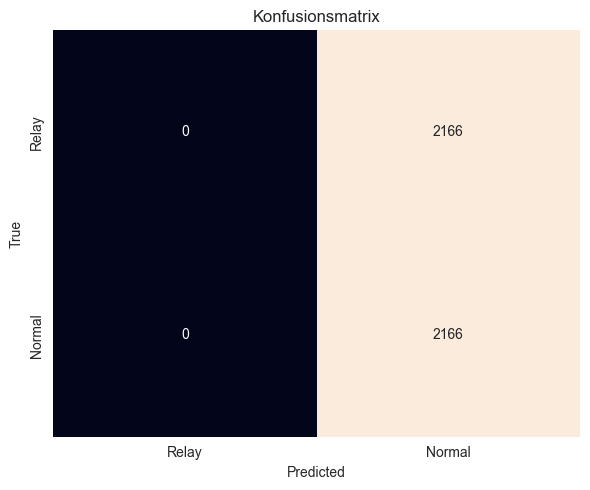

In [2]:
clf = SO_GAAL(contamination=0.01)
clf.fit(X_train)

# pyod.predict: 0 = inlier, 1 = outlier
y_pred = clf.predict(X_test_combined)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()

Epoch 1 of 60
Epoch 2 of 60
Epoch 3 of 60
Epoch 4 of 60
Epoch 5 of 60
Epoch 6 of 60
Epoch 7 of 60
Epoch 8 of 60
Epoch 9 of 60
Epoch 10 of 60
Epoch 11 of 60
Epoch 12 of 60
Epoch 13 of 60
Epoch 14 of 60
Epoch 15 of 60
Epoch 16 of 60
Epoch 17 of 60
Epoch 18 of 60
Epoch 19 of 60
Epoch 20 of 60
Epoch 21 of 60
Epoch 22 of 60
Epoch 23 of 60
Epoch 24 of 60
Epoch 25 of 60
Epoch 26 of 60
Epoch 27 of 60
Epoch 28 of 60
Epoch 29 of 60
Epoch 30 of 60
Epoch 31 of 60
Epoch 32 of 60
Epoch 33 of 60
Epoch 34 of 60
Epoch 35 of 60
Epoch 36 of 60
Epoch 37 of 60
Epoch 38 of 60
Epoch 39 of 60
Epoch 40 of 60
Epoch 41 of 60
Epoch 42 of 60
Epoch 43 of 60
Epoch 44 of 60
Epoch 45 of 60
Epoch 46 of 60
Epoch 47 of 60
Epoch 48 of 60
Epoch 49 of 60
Epoch 50 of 60
Epoch 51 of 60
Epoch 52 of 60
Epoch 53 of 60
Epoch 54 of 60
Epoch 55 of 60
Epoch 56 of 60
Epoch 57 of 60
Epoch 58 of 60
Epoch 59 of 60
Epoch 60 of 60

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

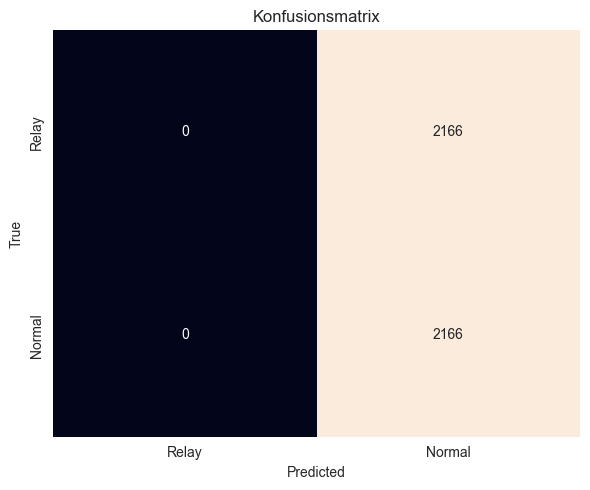

In [3]:
clf = SO_GAAL(contamination=0.01)
clf.fit(X_train_scaled_standard)

# pyod.predict: 0 = inlier, 1 = outlier
y_pred = clf.predict(X_test_combined_scaled_standard)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()

Epoch 1 of 60
Epoch 2 of 60
Epoch 3 of 60
Epoch 4 of 60
Epoch 5 of 60
Epoch 6 of 60
Epoch 7 of 60
Epoch 8 of 60
Epoch 9 of 60
Epoch 10 of 60
Epoch 11 of 60
Epoch 12 of 60
Epoch 13 of 60
Epoch 14 of 60
Epoch 15 of 60
Epoch 16 of 60
Epoch 17 of 60
Epoch 18 of 60
Epoch 19 of 60
Epoch 20 of 60
Epoch 21 of 60
Epoch 22 of 60
Epoch 23 of 60
Epoch 24 of 60
Epoch 25 of 60
Epoch 26 of 60
Epoch 27 of 60
Epoch 28 of 60
Epoch 29 of 60
Epoch 30 of 60
Epoch 31 of 60
Epoch 32 of 60
Epoch 33 of 60
Epoch 34 of 60
Epoch 35 of 60
Epoch 36 of 60
Epoch 37 of 60
Epoch 38 of 60
Epoch 39 of 60
Epoch 40 of 60
Epoch 41 of 60
Epoch 42 of 60
Epoch 43 of 60
Epoch 44 of 60
Epoch 45 of 60
Epoch 46 of 60
Epoch 47 of 60
Epoch 48 of 60
Epoch 49 of 60
Epoch 50 of 60
Epoch 51 of 60
Epoch 52 of 60
Epoch 53 of 60
Epoch 54 of 60
Epoch 55 of 60
Epoch 56 of 60
Epoch 57 of 60
Epoch 58 of 60
Epoch 59 of 60
Epoch 60 of 60

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

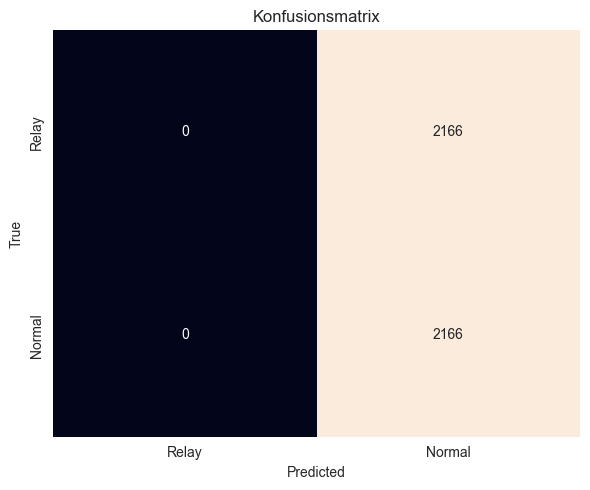

In [4]:
clf = SO_GAAL(contamination=0.01)
clf.fit(X_train_scaled_minmax)

# pyod.predict: 0 = inlier, 1 = outlier
y_pred = clf.predict(X_test_combined_scaled_minmax)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()